<a href="https://colab.research.google.com/github/SamuelVanWilson/Machine-Learning-Daily-Projects/blob/main/DAY_4_KLASIFIKASI_DAN_NEURAL_NETWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**KLASIFIKASI ANGKA TULISAN TANGAN DENGAN NEURAL NETWORK**

###IMPORT LIBRARY

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

library `tensorflow` digunakan untuk membuat dan melatih model deep learning

---

`from tensorflow.keras.datasets import mnist` digunakan untuk mengambil dataset **mnist**, dataset **mnist** berisi 60.000 gambar training dan 10.000 gambar test

`from tensorflow.keras.models import Sequential` digunakan untuk memilih model neural network secara berurutan(**layer-by-layer**)

`from tensorflow.keras.layers import Dense, Flatten` fungsi **Dense** digunakan untuk koneksi layer ke neuron selanjutnya, sedangkan fungsi **Flatten** untuk mengubah gambar 2D(28x28) menjadi vektor 1D

`from tensorflow.keras.utils import to_categorical` fungsi **to_categorical** digunakan untuk mengubah label angka menjadi **one-hot encoding**

---

`import matplotlib.pyplot as plt` digunakan untuk visualisasi grafik data

`import numpy as np` digunakan untuk melakukan komputasi numerik(operasi matematika) yang stabil untuk membuat model

###LOAD DATASET DARI MNIST

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


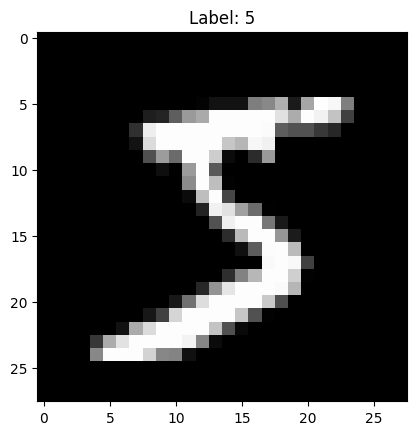

In [ ]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

`mnist.load_data()` berguna untuk mengunduh dataset **MNIST** secara langsung dari server

di **tensorflow** kita bisa langsung memecah secara langsung untuk data training dan data test secara otomatis dibanding menggunakan **skicit learn** yang harus eksplisit menggunakan fungsi `train_test_split()`

---

`plt.imshow` berguna untuk menampilkan gambar dari array. parameter pertama `x_train[0]` gambar pertama di dataset training. parameter kedua `cmap='gray'` menentukan warna gambar sebagai grayscale(hitam-putih)

`plt.title()` memberikan judul pada grafik gambar

`plt.show()` menampilkan hasil gambar `plt.imshow()` dan judul `plt.title()`

jadi kegunaan semua yg diatas untuk menampilkan contoh gambar pada dataset pertama

###PREPROCESSING DATA

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

apa tujuan dari preproccesing data? preproccesing data biasanya dilakukan setelah mengeksorasi data (**EDA**) setelah memahami dan menganalisis dataset, kita jadi tau mana fitur yang diperlukan dan data kotor yang perlu dibersihkan dengan menggunakan teknik apa, baru esekusi dengan cara preporccessing untuk menyelasaikan semua masalah itu (dilakukan setelah melakukann **EDA**), preproccesing sangat penting sebelum melatih model untuk mendapatkan dataset yang baik

---

variabel `x_train` dan `x_test` dilakukan normalisasi pada nilai pixel gambar MNIST berkisar **0-255** menjadi **0-1**, agar nilai pixel berubah menjadi rentang **0-1**, kita bisa membagi semua pixel oleh 255

ini sangat penting untuk perhitungan matematika di model yang lebih stabil,  karena jika nilai pixel yang terlalu besar(**0-255**) maka model bisa jadi tidak stabil

-nilai pixel 0(hitam)
-nilai pixel 255(putih)

---

variabel `y_train` dan `y_test` dilakukan teknik one-hot encoding. kenapa ini perlu dilakukan? model neural network memerlukan output dalam bentuk probabilitas untuk setiap kelas

fungsi `to_categorical` mengubah angka menjadi vektor biner dengan panjang 10 (sesuai paramater ke-2 `num_classes=10` karena ada 10 kelas), contoh gambarannya:
- Label `3` → `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`
- Label `7` → `[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]`

Jika model memprediksi `[0.01, 0.02, 0.01, 0.9, ...]`, artinya model yakin gambar tersebut adalah kelas 3.

###MEMBUAT MODEL DENGAN NEURAL NETWORK

In [ ]:

model = Sequential([
 Flatten(input_shape=(28, 28)),
 Dense(128, activation='relu'),
 Dense(10, activation='softmax')
])

model.compile(
 optimizer='adam',
 loss='categorical_crossentropy',
 metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


variabel `model`untuk menyimpan model yang sudah dibuat dengan menggunakan `Sequential()`

---

####**Membuat Model**
`Sequential()` berguna untuk membangun model neural network(layer by layer)

- layer-layer dalam model `Sequential()`:
 - `Flatten(input_shape=(28, 28))` untuk mengubah gambar 2D menjadi vektor 1D, ini dilakukan karena neural network hanya bisa memproses data 1D
 - `Dense(128, activation='relu')` untuk mengghubungkan layer neuron ke layer neuron berikutnya ada 128 neuoron yang terhubung(*fully connected*), kalo param ke 2 `activation='relu'` mengubah nilai negatif menjadi 0 dan membiarkan nilai tetap menjadi positif, ini sangat penting untuk membantu model mempelajari pola kompleks dari data
 - `Dense(10, activation='softmax')` untuk menghasilkan output model berupa probabilitas, dengan output layer 10 neuron, dan param ke-2 `activation='softmax'` fungsi aktivasi yang menghasilkan probabilitas untuk setiap kelaa, Contoh Output: `[0.01, 0.02, 0.01, 0.9, ...]` → Model yakin gambar adalah kelas 3.

---

####**Mengompilasi Model**

apa itu **compile**? compile merupakan cara kita untuk mengatur cara belajar model, hal yang kita perlukan untuk meng-*compile* model:
- **optimizer**: algoritma untuk memperbarui bobot model
- **loss function**: fungsi untuk mengukur kesalahan prediksi model
- **metrics**: metrik untuk mengevaluasi performa model

**parameter compile**:
1. `optimizer='adam'` digunakan untuk menyesuaikan bobot model untuk meminimalkan kesalahan. `adam` adalah optimizer yang populer karena cepat dan efisien.
2. `loss='categorical_crossentropy'` digunakan untuk mengukur kesalahan prediksi untuk masalah klasifikasi multi-kelas
3. `metrics=['accuracy']` digunakan untuk mengukur akurasi

---

####**Gambaran Arsitektur Model**

```
Input Layer (784 neuron) → Hidden Layer (128 neuron) → Output Layer (10 neuron)
```

###LATIH MODEL

In [ ]:
history = model.fit(
 x_train,y_train,
 epochs=10,
 validation_split=0.2
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8646 - loss: 0.4795 - val_accuracy: 0.9569 - val_loss: 0.1508
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9598 - loss: 0.1363 - val_accuracy: 0.9654 - val_loss: 0.1167
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9748 - loss: 0.0853 - val_accuracy: 0.9687 - val_loss: 0.1046
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9814 - loss: 0.0655 - val_accuracy: 0.9714 - val_loss: 0.0950
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9864 - loss: 0.0476 - val_accuracy: 0.9737 - val_loss: 0.0897
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9893 - loss: 0.0371 - val_accuracy: 0.9754 - val_loss: 0.0884
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9915 - loss: 0.0291 - val_accuracy: 0.9745 - val_loss: 0.0893
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9938 - loss: 0.022

variabel `history` untuk menyimpan riwayat pelatihan model

---

`model.fit()` digunakan untuk melatih model dengan fungsi `fit()`

- `x_train` digunakan sebagai **fitur** data pelatihan model
- `y_train` digunakan sebagai **label** data pelatihan model
- `epochs=10` artinya model akan melihat data training selama 10 kali. apa itu epochs? satu siklus dimana model akan melihat seluruh data training sekali, jika epochs 10 maka model akan belajar selama 10 kali dengan data yang sama
- `validation_split=0.2` 20% data training dipisahkan untuk **validasi** (seperti *ujian kecil* selama pelatihan). *fyi* setiap epochs model diuji dengan data validasi(validation_split=0.2) untuk memantau performa

###EVALUASI MODEL

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9751 - loss: 0.1018

Akurasi Test: 0.9780


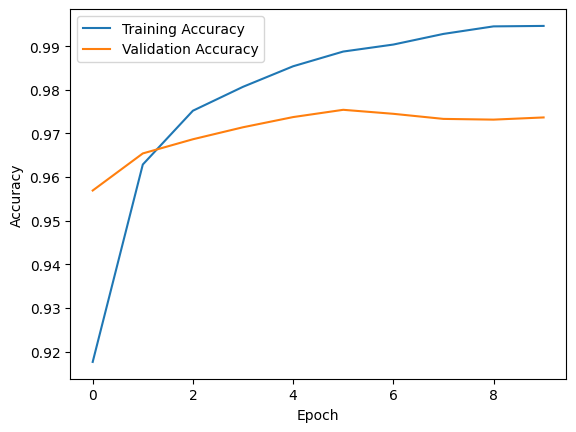

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nAkurasi Test: {test_acc:.4f}")

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

`model.evaluate` mengembalikan 2 nilai beruapa kesalahan prediksi pada data test yang nantinya disimpan ke variabel `test_loss`(semakin kecil semakin baik), dan 1 nya lagi menghitung akurasi model pada data test(disimpan kedalam variabel `test_acc`)

terus tampilkan nilai akurasi menggunakan `print()`

---

####Visualisasi Akurasi Training & Validasi

fungsi `plt.plot()` membuat plot garis grafik yang nantinya ditampilkan

fungsi `plt.legend()` membuat keterangan seperti legenda pada peta/grafik

parameter `history.history['accuracy']` pada `plt.plot()` berguna untuk memberikan data akurasi training pada setiap epoch yang nantinya digunakan untuk membuat grafik

parameter `history.history['val_accuracy']` pada `plt.plot()` berguna untuk memberikan data akurasi validasi pada setiap epoch yang nantinya digunakan untuk membuat grafik

---

`plt.plot(history.history['accuracy'], label='Training Accuracy')` syntax ini membuat plot garis untuk akurasi data training

`plt.plot(history.history['val_accuracy'], label='Validation Accuracy')` syntax ini membuat plot garis untuk akurasi data validasi

`plt.xlabel('Epoch')` membuat label pada sumbu x

`plt.ylabel('Accuracy')` membuat label pada sumbu y

`plt.legend()` menampilkan legenda pada grafik(keterangan garis)

`plt.show()` menampilkan grafik plot ke layar

###PREDIKSI CONTOH GAMBAR

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


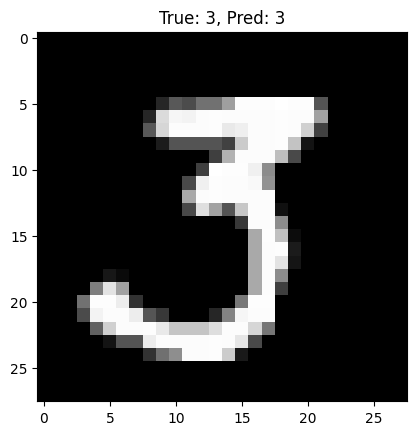

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


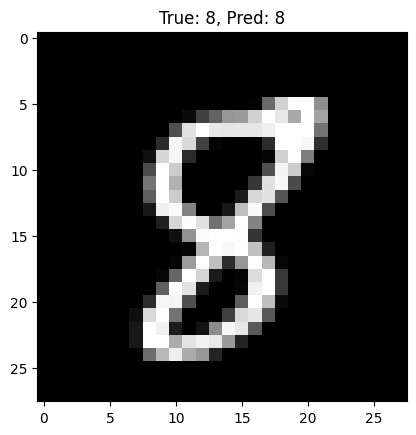

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


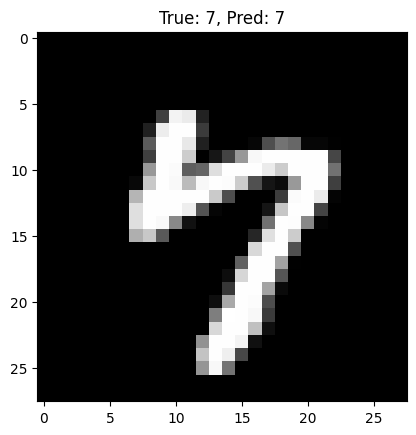

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


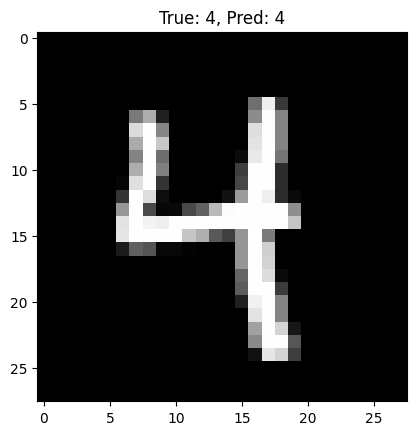

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


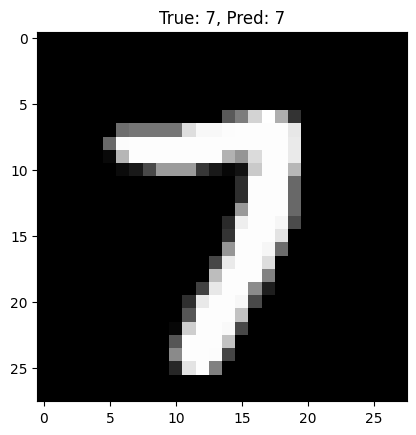

In [ ]:
indices = np.random.choice(len(x_test), 5)

for i in indices:
    img = x_test[i]
    true_label = np.argmax(y_test[i])

    pred = model.predict(img.reshape(1, 28, 28))
    pred_label = np.argmax(pred)

    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.show()

fungsi `np.random.choice()` digunakan untuk memilih 5 angka acak dari 0 sampai 9.999 dan nantinya 5 angka itu disimpan kedalam variabel `indices`

---

`for i in indices:` syntax ini digunakan untuk melakukan perulangan untuk setiap index yang dipilih dari variabel `indices`

- `img = x_test[i]` Mengambil gambar ke-`i` dari data test (`x_test`) lalu simpan kedalam variabel `img`
- `true_label = np.argmax(y_test[i])` mengembalikan indeks nilai terbesar (misal: 3). `y_test[i]` adalah one-hot encoding (misal: `[0,0,0,1,0,0,0,0,0,0]` untuk angka 3).
- `pred = model.predict(img.reshape(1, 28, 28))` Memprediksi gambar menggunakan model yang sudah dilatih dan menghasilkan **probabilitas** untuk setiap kelas (0-9).
- `pred_label = np.argmax(pred)` Mengambil indeks probabilitas tertinggi dari hasil prediksi.
- `plt.imshow(img, cmap='gray')` Menampilkan gambar dalam skala abu-abu (`cmap='gray'`).
- `plt.title(f"True: {true_label}, Pred: {pred_label}")` Menambahkan judul ke gambar
- `plt.show()` menampilkan gambar dan judul kedalam layar grafik